# QUANTUM THEORY OF CONDENSED MATTER - Numerical Project
Prof. Luca Barbiero

## Exercise a)
Calculate the ground state energy $E_{gs}$ of the one-dimensional Bose-Hubbard model (eq. below) with $N$ bosons and $L=2N$ sites and demonstrate that $E_{gs}$ weakly depends on the chosen basis (max. number of bosons in a single site) when $U\gg J$.
$$ H = -J\sum_{i=0}^{L-1}(b^\dagger_{i}b_{i+1} + b^\dagger_{i+1}b_i)+\frac{U}{2}\sum_{i=0}^{L-1}n_i(n_i-1)$$

In [12]:
#import the necessary packages
from quspin.operators import hamiltonian
from quspin.basis import boson_basis_1d
import numpy as np

import scipy.stats
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
#we define model parameters
L = 6 # system size
J = 1.0 # hopping
U = 4 # interaction

In [3]:
#define boson basis with L/2 bosons in the lattice
basis = boson_basis_1d(L,Nb=L//2)# full boson basis

It is useful to rewrite the hamiltonian as:
$$H= -J\sum_{j=0}^{L-1}(b^\dagger_{i}b_{i+1} + b^\dagger_{i+1}b_i)-\frac{U}{2}\sum_{i=0}^{L-1} n_i + \frac{U}{2}\sum_{i=0}^{L-1}n_in_i $$

In [4]:
# define site-coupling lists
hop=[[-J,i,(i+1)%L] for i in range(L)] #PBC
interact=[[0.5*U,i,i] for i in range(L)] # U/2 \sum_j n_j n_j
pot=[[-0.5*U,i] for i in range(L)] # -U/2 \sum_j j_n

In [5]:
# define static and dynamic lists
static=[['+-',hop],['-+',hop],['n',pot],['nn',interact]]
dynamic=[]

In [6]:
# build Hamiltonian
H=hamiltonian(static,dynamic,basis=basis,dtype=np.float64, check_symm=False)

Hermiticity check passed!
Particle conservation check passed!


In [7]:
# calculate eigensystem
#E,V=H.eigh()
E_GS,V_GS=H.eigsh(k=2,which='SA',maxiter=1E10) # only GS
print("GS energy is %0.3f" %(E_GS[0]))

GS energy is -4.953


We now set values for $U$ and $J$ in order to have $U\gg J$, we set a larger number of bosons and iterate for different values of the `sps` parameter in `boson_basis_1d` in order to prove that the ground state energy weakly depends on the chosen basis.

In [8]:
L = 16
J = 1.0
U = 25

#site-coupling lists
hop=[[-J,i,(i+1)%L] for i in range(L)]
interact=[[0.5*U,i,i] for i in range(L)]
pot=[[-0.5*U,i] for i in range(L)]

#static and dynamic lists
static=[['+-',hop],['-+',hop],['n',pot],['nn',interact]]
dynamic=[]

#loop for the iteration
sps_array = [3, 4, 5, 6, 7, 8, 9] #remember that sps counts also the state with 0 bosons
Egs_array = []
for i in range(len(sps_array)):
    basis = boson_basis_1d(L,Nb=L//2, sps=sps_array[i])
    H=hamiltonian(static,dynamic,basis=basis,dtype=np.float64, check_symm=False)
    E_GS,V_GS=H.eigsh(k=2,which='SA',maxiter=1E10)
    print("sps = ", sps_array[i], "E_gs = ", E_GS[0])
    Egs_array.append(E_GS[0])

Hermiticity check passed!
Particle conservation check passed!
sps =  3 E_gs =  -10.855896484480711
Hermiticity check passed!
Particle conservation check passed!
sps =  4 E_gs =  -10.856104364837206
Hermiticity check passed!
Particle conservation check passed!
sps =  5 E_gs =  -10.856104365302864
Hermiticity check passed!
Particle conservation check passed!
sps =  6 E_gs =  -10.85610436530279
Hermiticity check passed!
Particle conservation check passed!
sps =  7 E_gs =  -10.856104365302732
Hermiticity check passed!
Particle conservation check passed!
sps =  8 E_gs =  -10.85610436530276
Hermiticity check passed!
Particle conservation check passed!
sps =  9 E_gs =  -10.856104365302885


The fact that $E_{gs}$ is little-to-no dependent on the parameter `sps` is already visible from the printed values, to make it even more evident we can fit the results to a linear relation $y=a+bx$ (where $y$ is the ground state energy and $x$ is the max number of bosons in a single site) and check that the parameter $b$ is null.

In [9]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [10]:
def linear(x,a,b):
    y = a+b*x
    return y

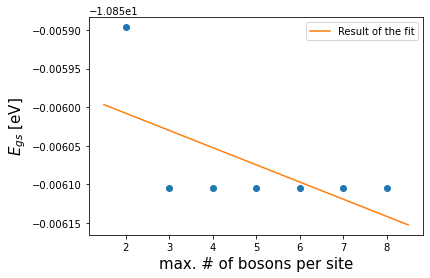

In [11]:
max_occ_array = []

for i in range(len(sps_array)):
    max_occ_array.append(sps_array[i]-1)
parameters, covariance = curve_fit(linear, max_occ_array, Egs_array)

a = parameters[0]
b = parameters[1]
par_errors=np.sqrt(np.diag(covariance))
erra=par_errors[0]
errb=par_errors[1]

x_fit=np.linspace(1.5, 8.5, 60)
y_fit=[]
for i in range(len(x_fit)):
    y_fit.append(linear(x_fit[i], a, b))
plt.plot(max_occ_array, Egs_array, 'o')
plt.plot(x_fit, y_fit, label="Result of the fit")

plt.xlabel("max. # of bosons per site", fontsize = 15)
plt.ylabel(r'$E_{gs}$ [eV]', fontsize = 15)

plt.legend()

We do a Z-test to check that $b$ is compatible with 0:

In [12]:
import scipy.stats

z=b/a
print("Z =", z)
p=scipy.stats.norm.sf(abs(z))*2
print("p-value =", p)

Z = 2.051681646374758e-06
p-value = 0.9999983629948906


We conclude that in the regime $U\gg J$ the ground state energy of of the one-dimensional Bose-Hubbard model $E_gs$ is independent of the chosen basis.

## Exercise b)
calculate the ground state energy $E_{GS}$ of the one dimensional Bose-Hubbard model in presence of lattice dimerization with $N$ bosons and $L=2N$ sites and discuss how/if/when $E_{GS}$ depends on the sign of the lattice dimerization.

$$H = -\sum_{i=0}^{L-1}(J+(-1)^i\delta J)(b^\dagger_{i}b_{i+1} + b^\dagger_{i+1}b_i)+\frac{U}{2}\sum_{i=0}^{L-1}n_i(n_i-1)$$

In [2]:
#we define model parameters
L = 6 # system size
J = 1.0 # hopping
deltaJ = 0.1 # bond dimerisation
U = 4 # interaction

In [3]:
#define boson basis with L/2 bosons in the lattice
basis = boson_basis_1d(L,Nb=L//2)# full boson basis

It is useful to rewrite the hamiltonian as:
$$H= -\sum_{i=0}^{L-1}(J+(-1)^i\delta J)(b^\dagger_{i}b_{i+1} + b^\dagger_{i+1}b_i)-\frac{U}{2}\sum_{i=0}^{L-1} n_i + \frac{U}{2}\sum_{i=0}^{L-1}n_in_i $$

In [4]:
hop_pm=[[-J-deltaJ*(-1)**i,i,(i+1)%L] for i in range(L)] # PBC
hop_mp=[[-J-deltaJ*(-1)**i,i,(i+1)%L] for i in range(L)] # PBC
interact=[[0.5*U,i,i] for i in range(L)] # U/2 \sum_j n_j n_j
pot=[[-0.5*U,i] for i in range(L)] # -U/2 \sum_j j_n

In [5]:
# define static and dynamic lists
static=[['+-',hop_pm],['-+',hop_mp],['n',pot],['nn',interact]]
dynamic=[]

In [6]:
# build Hamiltonian
H=hamiltonian(static,dynamic,basis=basis,dtype=np.float64, check_symm=False)

Hermiticity check passed!
Particle conservation check passed!


In [7]:
# calculate eigensystem
#E,V=H.eigh()
E_GS,V_GS=H.eigsh(k=2,which='SA',maxiter=1E10) # only GS
print("GS energy is %0.3f" %(E_GS[0]))

GS energy is -4.958


The ground state energy is independent on the sign of the lattice whenever the size of the system (*i.e.* the number of lattice sites) is even because due to the $(-1)^i$ the staggered potential appears in the Hamiltonian with alternated sign and opposite terms appear the same number of times. This is not verified in the alternative case in which the system has an odd number of sites, in that case $E_{GS}$ depends on the sign of the lattice dimerization.

This can be shown graphically:

In [17]:
def compute_ground_state_pbc(L, J, deltaJ, U):
    basis = boson_basis_1d(L,Nb=L//2)
    hop_pm=[[-J-deltaJ*(-1)**i,i,(i+1)%L] for i in range(L)] # PBC
    hop_mp=[[-J-deltaJ*(-1)**i,i,(i+1)%L] for i in range(L)] # PBC
    interact=[[0.5*U,i,i] for i in range(L)] # U/2 \sum_j n_j n_j
    pot=[[-0.5*U,i] for i in range(L)] # -U/2 \sum_j j_n
    static=[['+-',hop_pm],['-+',hop_mp],['n',pot],['nn',interact]]
    dynamic=[]
    H=hamiltonian(static,dynamic,basis=basis,dtype=np.float64, check_symm=False)
    E_GS,V_GS=H.eigsh(k=2,which='SA',maxiter=1E10)
    
    return E_GS[0]    

In [18]:
e_GS_plus_array_pbc = []
e_GS_minus_array_pbc = []
e_GS_zero_array_pbc = []

l_array = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

U = 4
J = 1.0 

for i in range(len(l_array)):
    L = l_array[i] # system size
    deltaJ = 0.2
    e_GS_plus_array_pbc.append(compute_ground_state_pbc(L, J, deltaJ, U))

    L = l_array[i] # system size
    deltaJ = -0.2
    e_GS_minus_array_pbc.append(compute_ground_state_pbc(L, J, deltaJ, U))
    
    L = l_array[i] # system size
    deltaJ = 0.
    e_GS_zero_array_pbc.append(compute_ground_state_pbc(L, J, deltaJ, U))    

Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermitic

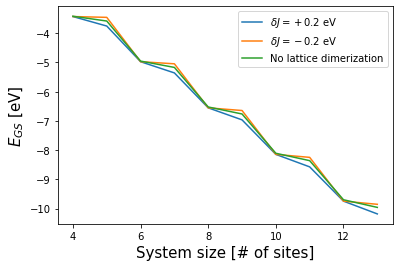

In [19]:
plt.plot(l_array, e_GS_plus_array_pbc, label=r'$\delta J=+0.2$ eV')
plt.plot(l_array, e_GS_minus_array_pbc, label=r'$\delta J=-0.2$ eV')
plt.plot(l_array, e_GS_zero_array_pbc, label=r'No lattice dimerization')

plt.xlabel(r'System size [# of sites]', fontsize = 15)
plt.ylabel(r'$E_{GS}$ [eV]', fontsize = 15)

plt.legend()


We clearly see that for $L$ even the three cases have the same ground state energy while $E_{GS, +}<E_{GS, 0}<E_{GS, -}$ for $L$ odd.

In the previous discussion we have used periodic boundary conditions (PBCs), if we switch to open boundary conditions (OBCs) we expect the result of the previous discussion to be subverted: with OBCs the ground state energy of the system will be independent of the sign of the lattice dimerization when the number of sites is odd while it will depend on it when we have an even system size. 

In [23]:
def compute_ground_state_obc(L, J, deltaJ, U):
    basis = boson_basis_1d(L,Nb=L//2)
    hop_pm=[[-J-deltaJ*(-1)**i,i,(i+1)%L] for i in range(L-1)] # OBC
    hop_mp=[[-J-deltaJ*(-1)**i,i,(i+1)%L] for i in range(L-1)] # OBC
    interact=[[0.5*U,i,i] for i in range(L)] # U/2 \sum_j n_j n_j
    pot=[[-0.5*U,i] for i in range(L)] # -U/2 \sum_j j_n
    static=[['+-',hop_pm],['-+',hop_mp],['n',pot],['nn',interact]]
    dynamic=[]
    H=hamiltonian(static,dynamic,basis=basis,dtype=np.float64, check_symm=False)
    E_GS,V_GS=H.eigsh(k=2,which='SA',maxiter=1E10)
    
    return E_GS[0]  

In [24]:
e_GS_plus_array_obc = []
e_GS_minus_array_obc = []
e_GS_zero_array_obc = []

l_array = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

U = 4
J = 1.0 

for i in range(len(l_array)):
    L = l_array[i] # system size
    deltaJ = 0.2
    e_GS_plus_array_obc.append(compute_ground_state_obc(L, J, deltaJ, U))

    L = l_array[i] # system size
    deltaJ = -0.2
    e_GS_minus_array_obc.append(compute_ground_state_obc(L, J, deltaJ, U))
    
    L = l_array[i] # system size
    deltaJ = 0.
    e_GS_zero_array_obc.append(compute_ground_state_obc(L, J, deltaJ, U))  

Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermitic

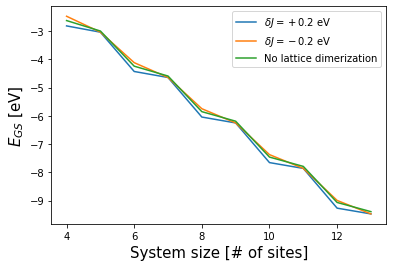

In [25]:
plt.plot(l_array, e_GS_plus_array_obc, label=r'$\delta J=+0.2$ eV')
plt.plot(l_array, e_GS_minus_array_obc, label=r'$\delta J=-0.2$ eV')
plt.plot(l_array, e_GS_zero_array_obc, label=r'No lattice dimerization')

plt.xlabel(r'System size [# of sites]', fontsize = 15)
plt.ylabel(r'$E_{GS}$ [eV]', fontsize = 15)

plt.legend()

We clearly see that for $L$ odd the three cases have the same ground state energy while $E_{GS, +}<E_{GS, 0}<E_{GS, -}$ for $L$ even.

This result confirms our prediction. Understanding this is nearly trivial: the difference between PBCs and OBCs is the addition of an hopping between site $L$ and site $1$ (if $L$ is the size of the system and we're labelling sites $\{1,...,L\}$) thus imposing translational invariance. This added hopping is the reason for which we have subversion of the result.